# 회귀분석_ 최적회귀_정규화_tree회귀

## 보스턴 집값 데이터 회귀분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv')

In [13]:
data

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [15]:
data.describe()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 결측치, 이상치, 중복값 처리

In [5]:
data.isna().sum()

범죄율             0
25,000평방피트초과    0
비소매상업지역비율       0
찰스강경계           0
농축 일산화질소        0
가구당평균방수         0
1940년이전건축비율     0
직업센터접근성         0
도로접근성           0
재산세율            0
학생/교사비율         0
흑인비율            0
하위계층비율          0
주택가격            0
dtype: int64

In [8]:
len(data[data.duplicated()])

0

In [10]:
# 이상치 확인
# 데이터셋의 모든 컬럼이 수치형 자료임을 확인
data_num = data.select_dtypes(exclude='object')
data_num.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

============================== 범죄율 ==============================
count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: 범죄율, dtype: float64


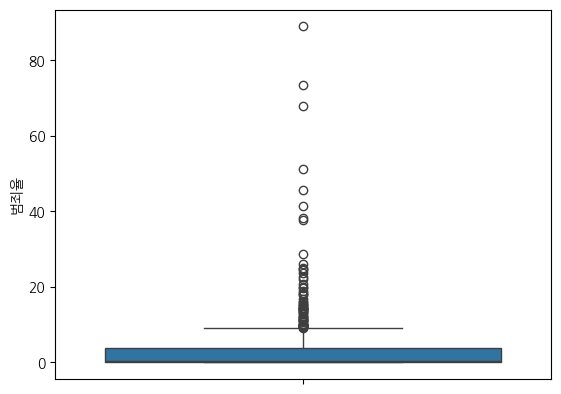

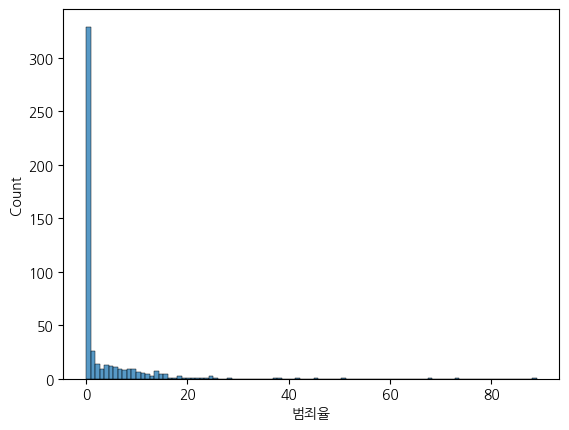




============================== 25,000평방피트초과 ==============================
count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: 25,000평방피트초과, dtype: float64


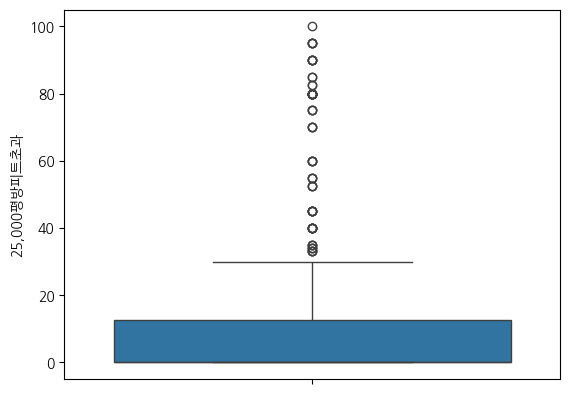

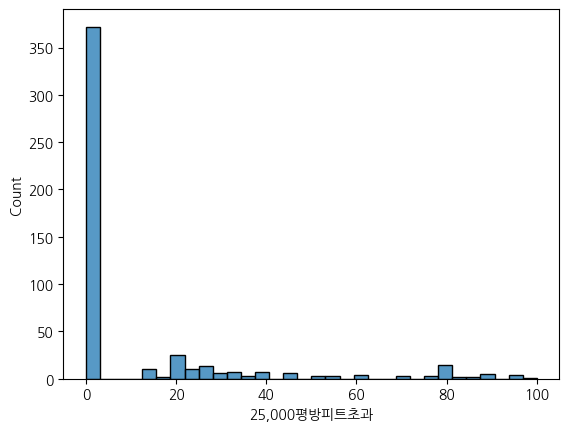




============================== 비소매상업지역비율 ==============================
count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: 비소매상업지역비율, dtype: float64


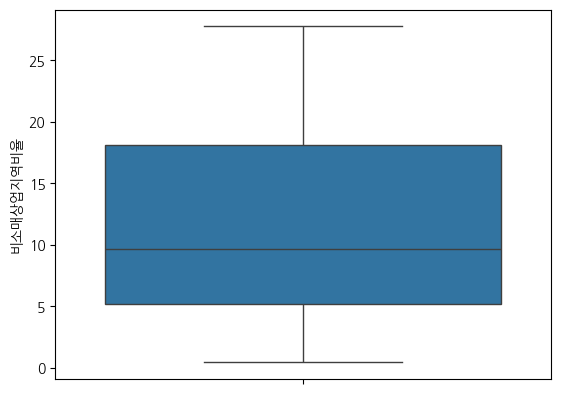

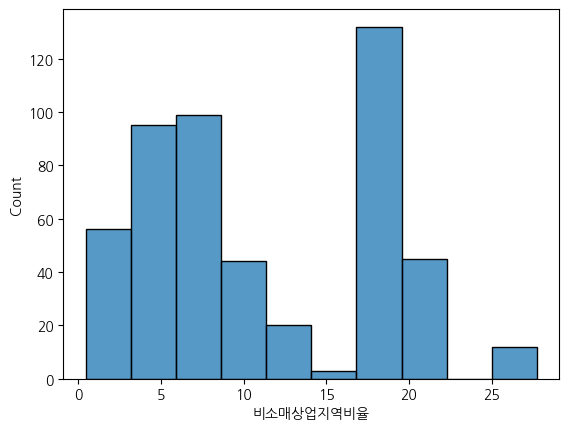




============================== 찰스강경계 ==============================
count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: 찰스강경계, dtype: float64


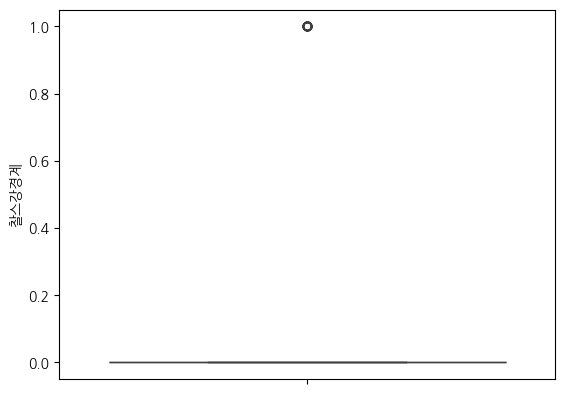

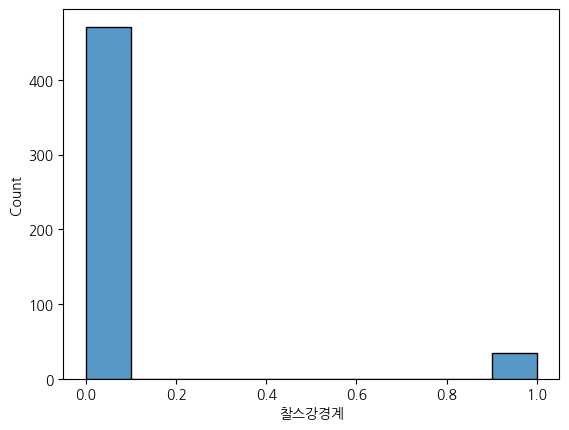




============================== 농축 일산화질소 ==============================
count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: 농축 일산화질소, dtype: float64


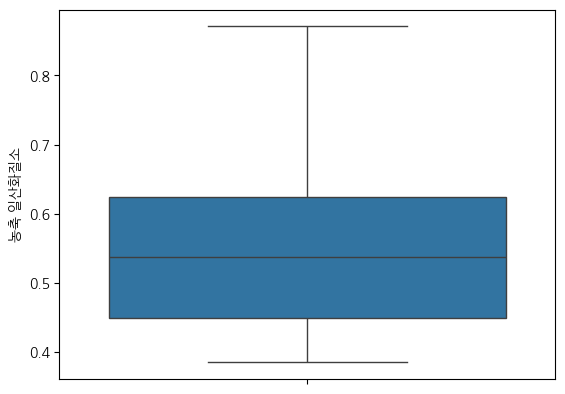

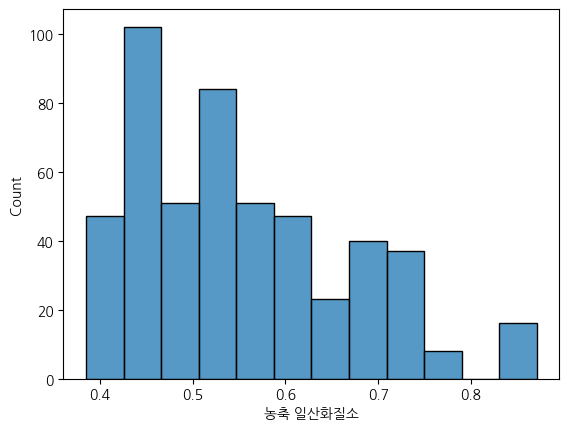




============================== 가구당평균방수 ==============================
count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: 가구당평균방수, dtype: float64


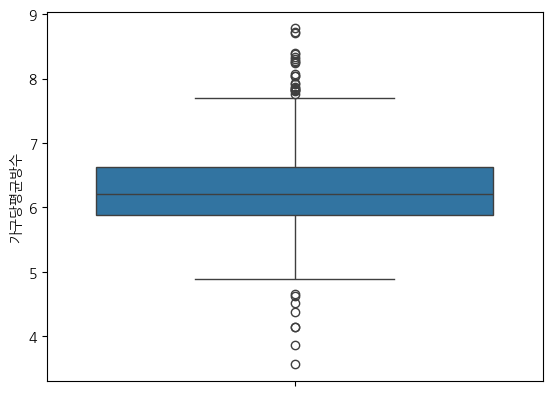

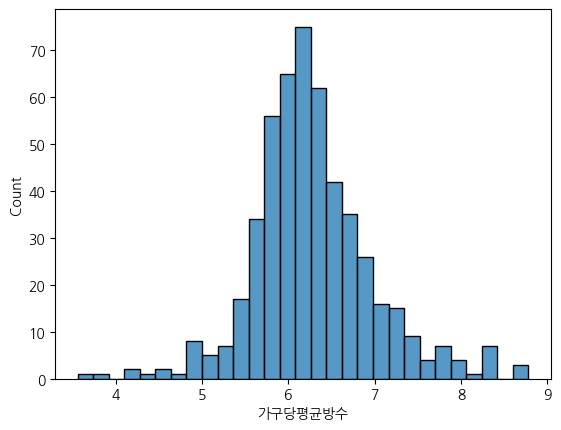




============================== 1940년이전건축비율 ==============================
count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: 1940년이전건축비율, dtype: float64


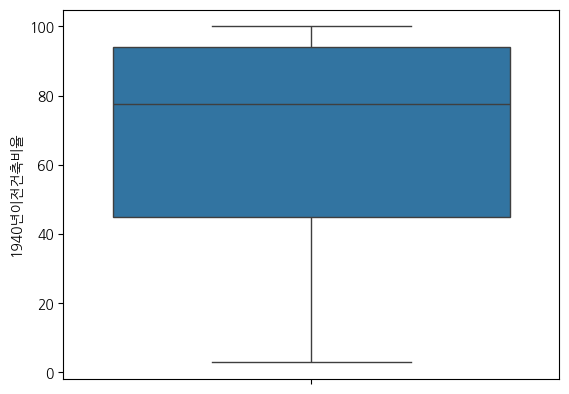

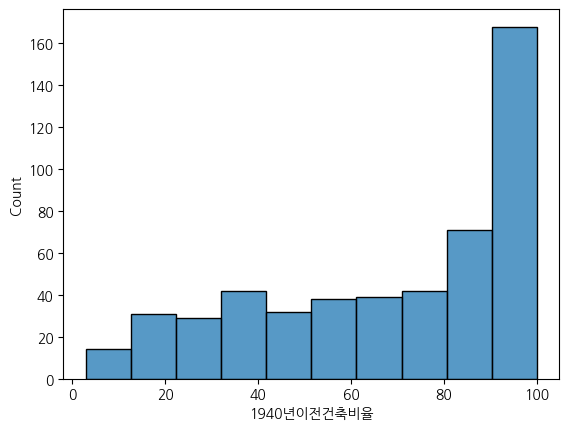




============================== 직업센터접근성 ==============================
count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: 직업센터접근성, dtype: float64


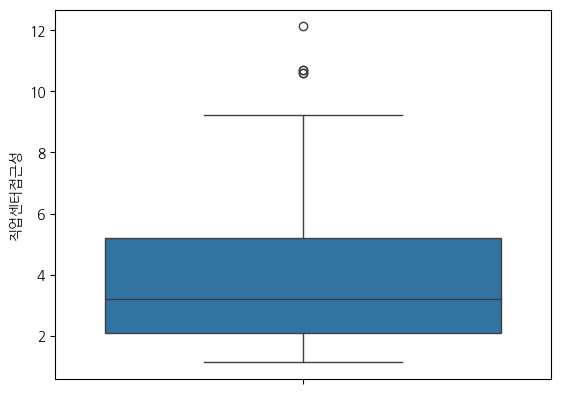

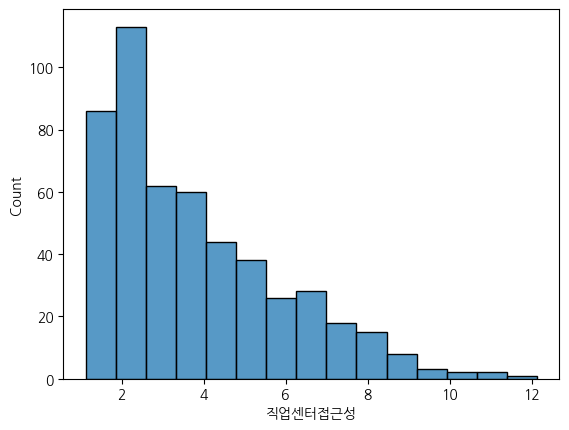




============================== 도로접근성 ==============================
count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: 도로접근성, dtype: float64


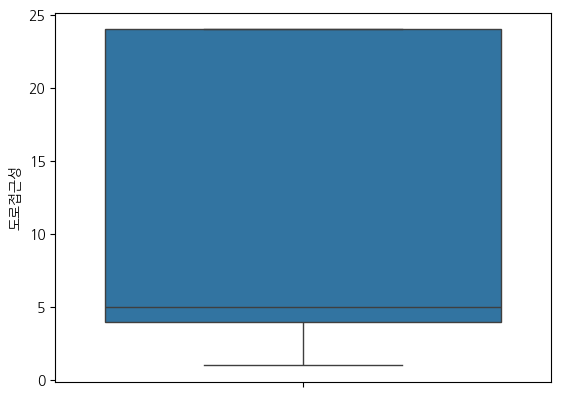

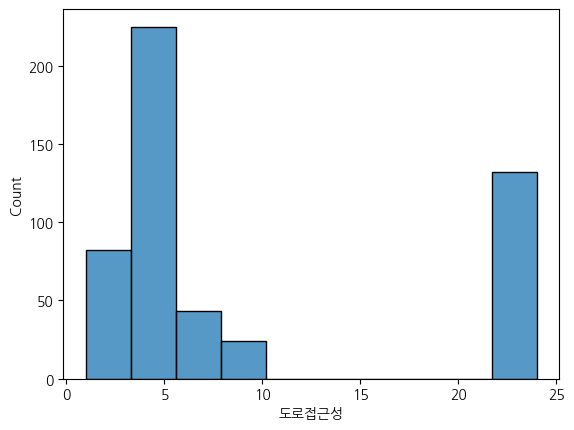




============================== 재산세율 ==============================
count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: 재산세율, dtype: float64


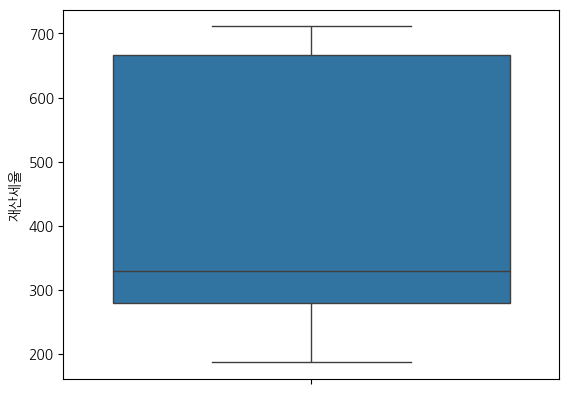

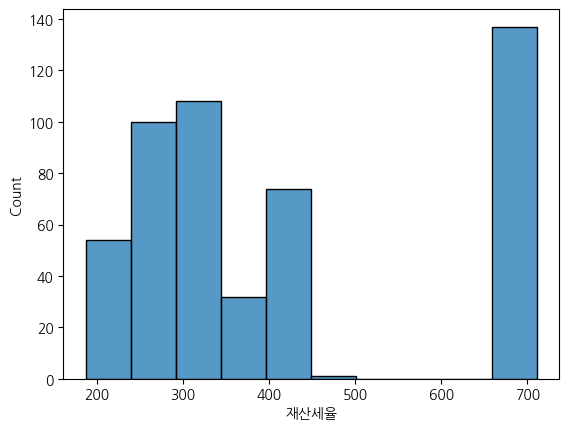




============================== 학생/교사비율 ==============================
count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: 학생/교사비율, dtype: float64


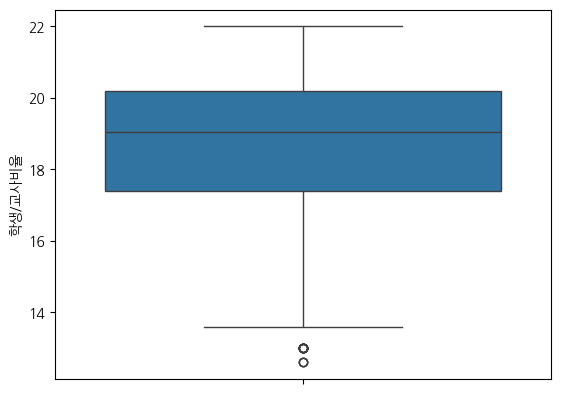

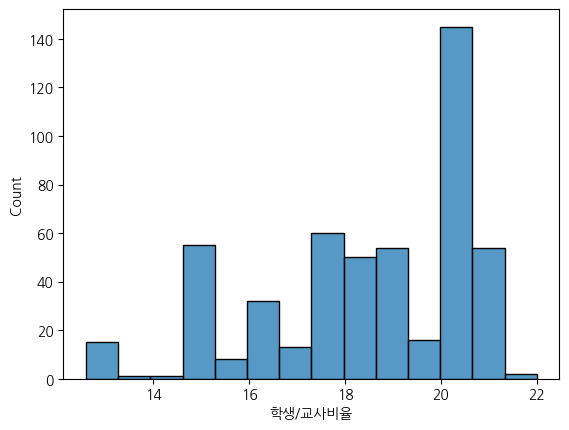




============================== 흑인비율 ==============================
count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: 흑인비율, dtype: float64


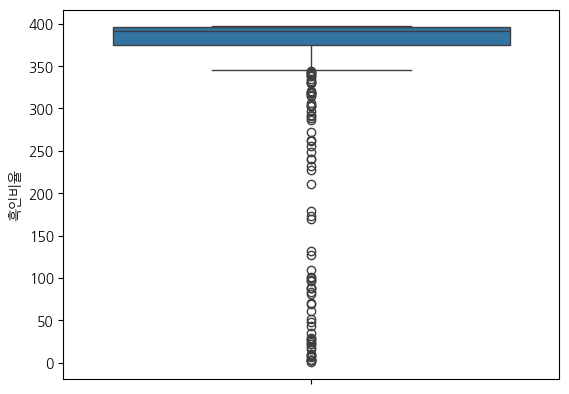

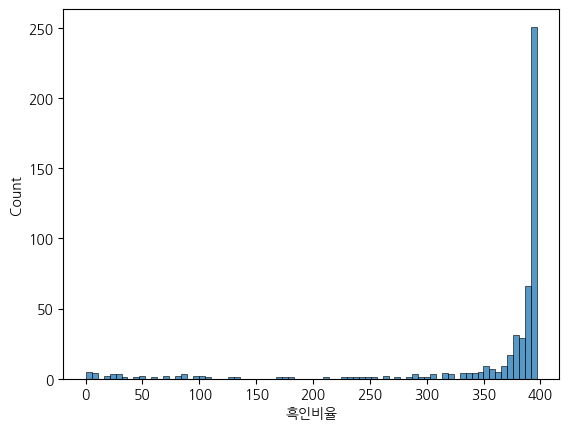




============================== 하위계층비율 ==============================
count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: 하위계층비율, dtype: float64


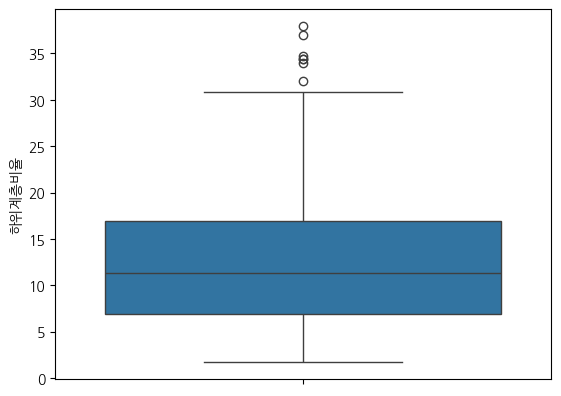

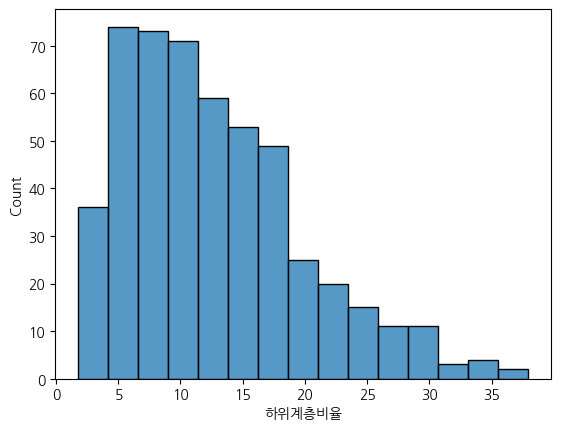




============================== 주택가격 ==============================
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: 주택가격, dtype: float64


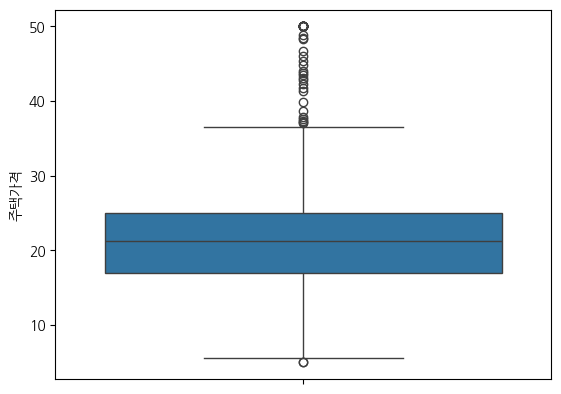

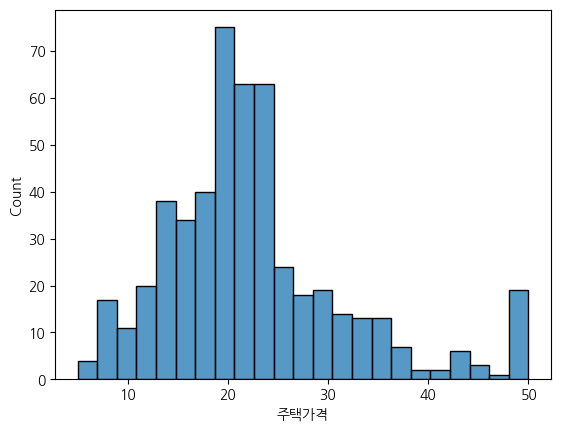

In [20]:
# 각 컬럼을 박스 플롯으로 확인
for col in data:
#     print(col)
    print('='*30, col, '='*30)
    print(data[col].describe())
    
    sns.boxplot(data[col])
    plt.show()
    print('\n\n')
    
    sns.histplot(data[col])
    plt.show()
    print('\n\n')
    

### 이상치 있다고 판단되는 컬럼 확인
- 범죄율 : 범죄율이 매우 높은 곳 존재 -> 흑인 비율과 관련성 높을 수 있음(할렘가와 같은 지역은 범죄율 높을 것이라고 생각)
- 25,000평방피트초과 : 0인 경우가 많아서 평균이 매우 낮아짐 -> 높은쪽의 이상치가 많다고 판단됨
- 가구당평균방수 : 표준정규분포 형태
- 직업센터 접근성 : 데이터 분포 고름 -> 직업센터 접근성이 매우 좋은 곳도 존재
- 학생 교사 비율 : 데이터 분포 고름
- 흑인 비율 : 급격하게 높은 지역 존재 -> 할렘가와 같은 지역 존재 가능성 내포
- 하위계층비율 : 데이터 분포 고름
- 주택가격 : 데이터 분포가 고름

<Axes: >

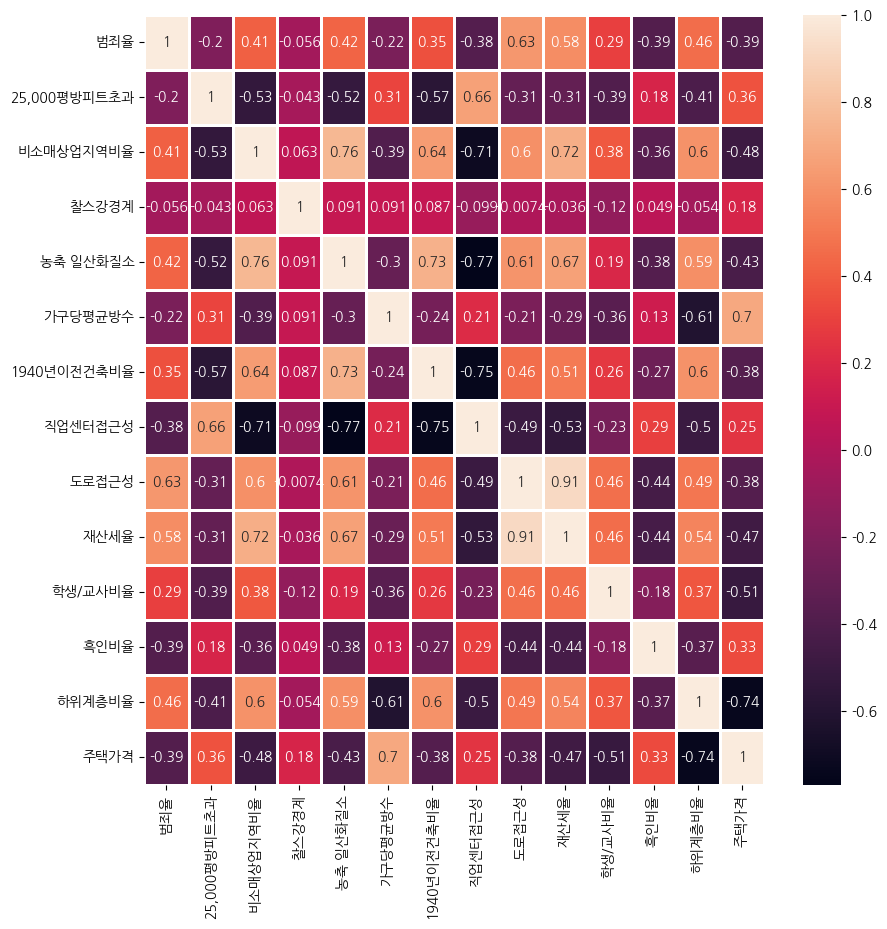

In [69]:
# 데이터 컬럼 간의 연관성 확인
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidth=1)

### 데이터 홀드아웃, 스케일링, 분석

In [22]:
X = data.drop('주택가격', axis=1)
y = data['주택가격']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

### 이상치가 있는 컬럼은 RobustScaler 적용 / 나머지 컬럼은 StandardScaler

In [42]:
X_train.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율'],
      dtype='object')

In [43]:
X_test.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율'],
      dtype='object')

In [32]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [31]:
rbs_col = ['범죄율','25,000평방피트초과','가구당평균방수','직업센터접근성','재산세율','학생/교사비율','흑인비율','하위계층비율']
ss_col = ['비소매상업지역비율', '찰스강경계', '농축 일산화질소','1940년이전건축비율','도로접근성']

X_train_rbs = X_train[rbs_col]
X_test_rbs = X_test[rbs_col]

X_train_ss = X_train[ss_col]
X_test_ss = X_test[ss_col]

In [33]:
# 이상치 있는 컬럼 RobustScaler 적용
rbs = RobustScaler()
rbs.fit(X_train_rbs)
rbs_X_train = rbs.transform(X_train_rbs)
rbs_X_test = rbs.transform(X_test_rbs)

# 이상치 없으면 StandardScaler 적용
ss = StandardScaler()
ss.fit(X_train_ss)
ss_X_train = ss.transform(X_train_ss)
ss_X_test = ss.transform(X_test_ss)


In [36]:
# 각각 데이터프레임으로 만들어 합치기
X_train_out = pd.DataFrame(rbs_X_train, columns=X_train_rbs.columns, index = X_train_rbs.index)
X_test_out = pd.DataFrame(rbs_X_test, columns=X_test_rbs.columns, index = X_test_rbs.index)

In [37]:
X_train_ss = pd.DataFrame(ss_X_train, columns=X_train_ss.columns, index = X_train_ss.index)
X_test_ss = pd.DataFrame(ss_X_test, columns=X_test_ss.columns, index = X_test_ss.index)

In [40]:
# 데이터프레임 결합
X_train = pd.concat([X_train_out, X_train_ss], axis=1)
X_train = X_train[['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율']]
X_train

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
58,-0.018836,1.290323,-0.842589,-0.263603,-0.829371,-0.103757,-1.398202,1.456082,-0.153988,-0.118252,0.214286,-0.051161,-0.464437
410,16.835534,0.000000,1.060541,-0.263603,0.438229,-0.659034,1.159282,-0.639519,1.713656,0.863753,0.392857,-18.350348,-0.119427
481,1.817220,0.000000,1.060541,-0.263603,-0.133952,0.762075,0.252603,-0.011441,1.713656,0.863753,0.392857,0.061535,-0.371019
69,-0.027527,0.645161,-0.704659,-0.263603,-1.216694,-0.475850,-1.260936,1.025034,-0.620900,0.038560,-0.071429,0.242131,-0.259554
41,-0.027765,0.000000,-0.581403,-0.263603,-0.873385,0.790698,-2.348228,0.770653,-0.737627,-0.249357,-0.428571,-0.299658,-0.678875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,7.220169,0.000000,1.060541,-0.263603,1.697028,-0.571735,0.884750,-0.491166,1.713656,0.863753,0.392857,-0.014853,1.154459
165,0.896774,0.000000,1.277707,-0.263603,0.508652,-0.166726,0.906423,-0.354597,-0.504172,0.187661,-1.571429,-7.148650,-0.151274
7,-0.022109,0.645161,-0.440540,-0.263603,-0.204374,-0.065116,1.018404,0.845812,-0.504172,-0.048843,-1.392857,0.242131,0.840234
219,-0.032126,0.000000,0.442794,3.793587,0.024499,0.222540,0.884750,-0.001097,-0.504172,-0.138817,-0.964286,0.093127,-0.078025


In [45]:
X_test = pd.concat([X_test_out, X_test_ss], axis=1)
X_test = X_test[['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율']]
X_test

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
358,1.649802,0.000000,1.060541,3.793587,1.961111,-0.129517,0.559646,-0.210794,1.713656,0.863753,0.392857,0.172816,0.026008
197,-0.054471,4.129032,-1.372296,-0.263603,-1.260708,1.272987,-1.130894,1.290511,-0.854355,-0.002571,-2.321429,-1.766120,-0.278662
48,0.014032,0.000000,-0.581403,-0.263603,-0.873385,-1.171377,0.989506,0.819461,-0.737627,-0.249357,-0.428571,0.242131,2.078025
450,2.150973,0.000000,1.060541,-0.263603,1.459352,0.760644,0.891974,-0.341438,1.713656,0.863753,0.392857,-18.457857,0.658705
469,4.252715,0.000000,1.060541,-0.263603,0.288582,-0.722004,-0.404829,-0.177732,1.713656,0.863753,0.392857,0.242131,0.374204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.001906,0.000000,-0.041425,3.793587,-0.512471,-0.587478,-0.509585,0.093604,-0.620900,-0.136247,-0.178571,-0.038901,0.509023
133,0.039141,0.000000,1.616660,-0.263603,0.675905,-0.566011,0.993118,-0.293547,-0.620900,0.275064,0.750000,-0.144996,0.402866
279,-0.000345,1.032258,-1.106708,-0.263603,-0.918280,0.850805,-1.289834,0.240288,-0.504172,-0.293059,-1.500000,0.242131,-0.677813
274,-0.051238,2.064516,-0.654770,3.793587,-0.882188,0.773524,-1.264548,0.232726,-0.620900,-0.195373,-0.535714,0.242131,-0.817941


## 다중선형회귀 분석


In [46]:
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [48]:
# 상수항 추가
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [50]:
X_train_const.head(2)

,const,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
58,1.0,-0.018836,1.290323,-0.842589,-0.263603,-0.829371,-0.103757,-1.398202,1.456082,-0.153988,-0.118252,0.214286,-0.051161,-0.464437
410,1.0,16.835534,0.000000,1.060541,-0.263603,0.438229,-0.659034,1.159282,-0.639519,1.713656,0.863753,0.392857,-18.350348,-0.119427


In [51]:
X_test_const.head(2)

,const,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
358,1.0,1.649802,0.000000,1.060541,3.793587,1.961111,-0.129517,0.559646,-0.210794,1.713656,0.863753,0.392857,0.172816,0.026008
197,1.0,-0.054471,4.129032,-1.372296,-0.263603,-1.260708,1.272987,-1.130894,1.290511,-0.854355,-0.002571,-2.321429,-1.766120,-0.278662


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [76]:
ols = sm.OLS(y_train, X_train_const).fit()
pred = ols.predict(X_test_const)
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     75.66
Date:                Thu, 08 May 2025   Prob (F-statistic):           6.35e-92
Time:                        15:20:19   Log-Likelihood:                -1017.3
No. Observations:                 354   AIC:                             2063.
Df Residuals:                     340   BIC:                             2117.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.5487      0.423     55.651   

In [77]:
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))

MAE:  3.907966145625518
MSE:  31.82963115555757
RMSE:  5.641775532184666
R2_Score:  0.7215519718844164


### 회귀분석 지표

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
# 회귀 분석 모델로 예측
pred = lr.predict(X_test_const)

In [56]:
print('mean_squared_error: ',mean_squared_error(y_test, pred))
print('root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test, pred)))

mean_squared_error:  31.82963115555757
root_mean_squared_error:  5.641775532184666


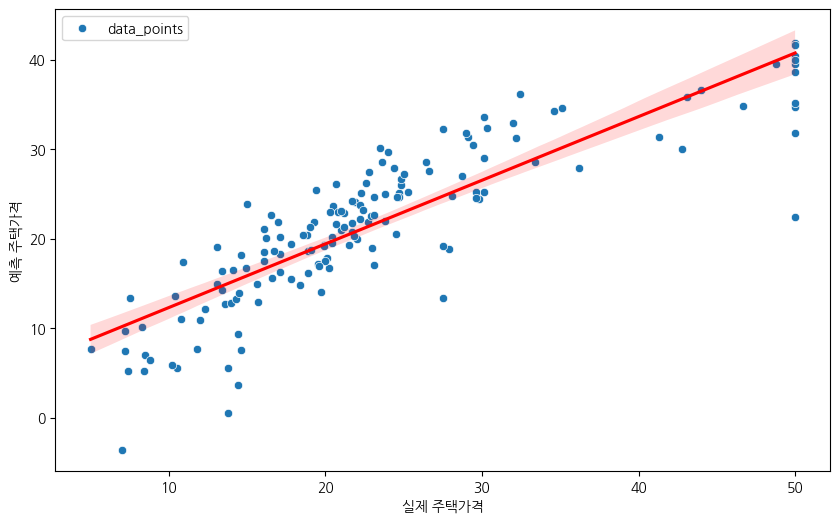

In [62]:
# 산점도와 회귀선 그리기
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y=pred, label='data_points')
sns.regplot(x=y_test, y=pred, scatter=False, label='regression line', color='red')
plt.xlabel('실제 주택가격')
plt.ylabel('예측 주택가격')
plt.show()

In [78]:
# 여기에서 나아가 전진선택법과 후진선택법을 하지 않음